<a href="https://colab.research.google.com/github/ABDELLAH-Hallou/BigMart-outlet-sales-prediction/blob/master/BigMart_outlet_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Description** : BigMart outlets Sales Prediction







#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
## Our objective
#### Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

##We will handle this problem in a structured way. We will be following the table of content given below:

### 1.   Hypothesis Generation
### 2.   Loading Packages and Data
###3.   Data Structure and Content
###4.   Exploratory Data Analysis
###5.   Univariate Analysis
###6.   Bivariate Analysis
###7.   Missing Value Treatment
###8.   Feature Engineering
###9.   Encoding Categorical Variables
###10.   Label Encoding
###11.   One Hot Encoding
###12.   PreProcessing Data
###13.   Modeling
###14.   Summary

#**Hypothesis Generation**


##Features based on the Store : 
####1.   The city in which the store is located : 
*   Stores located in urban cities should have higher sales compared to stores in rural areas
*   Stores located in big cities should have higher sales compared to stores located in small cities.

####2.   The location of the store in the city :
*   Stores located in the city center should have higher sales compared to stores on the outskirts of the city.

####3.   Competitor stores :
*   Stores close to competitor stores should sell less than other stores far away from competitor stores.

####4.   Size of the store :
*   Large stores should have higher sales than medium and small stores.

####5.   Store design and architecture: 
*   Well-designed stores can attract customers.

####6.   Marketing: 
*   Stores having a good marketing division can attract customers through the right offers.

##Features based on the Product : 
####1.   Product Utility:
*   Daily use products have a higher tendency to sell compared to other products.

####2.   Product Quality
*   The quality of the product and its packaging can attract customers and sell more.

####3.   Product Visibility in the store: 
*   Products that are placed in an attention-catching place should have higher sales.

####4.   Product Branding: 
*   Branded products have more trust of the customers so they should have high sales.

##Features based on the Customer : 
####1.   Job profile and annual income: 
*   A customer with a stable job and high income should have higher purchases.

####2.   Family size: 
*   A customer with a large family should have higher purchases

# **Loading Packages and Data**

In [122]:
# install required libs
!pip install fuzzywuzzy

In [123]:
# Loading Packages
import numpy as np
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Inconsistent Data Entry
import fuzzywuzzy
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore') #ignore annoying warning (from sklearn and seaborn)

In [124]:
# Loading Data
filenameTr = '/content/drive/MyDrive/Bigmart/Train.csv'
filenameTs = '/content/drive/MyDrive/Bigmart/Test.csv'
trainDf = pd.read_csv(filenameTr)
testDf = pd.read_csv(filenameTs)
trainDf.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Data Dictionary

#### We have train 8523 dataset, which contains both input and output variables,and test 5681 dataset, We need to predict the sales for these.
*   **Item_Identifier**: Product ID
*   **Item_Weight**: Product Weight 
*   **Item_Fat_Content**: Is the product Low Fat or not(Regular)
*   **Item_Visibility**: The percentage of total display area for all products in the store allocated to each product
*   **Item_Type**: Product Category
*   **Item_MRP**: Maximum Retail Price of the Product
*   **Outlet_Identifier**: Store ID
*   **Outlet_Establishment_Year**: The year in which the Store was established
*   **Outlet_Size**: The area of ground space covered by the store (Small-Medium-High)
*   **Outlet_Location_Type**: The type of city in which the store is located
*   **Outlet_Type**: The outlet Category (Grocery store or some sort of supermarket)
*   **Item_Outlet_Sales**: Sales of the product in the particulat store. This is the outcome variable to be predicted.

# **Data Structure and Content**

In [125]:
trainDf['type']='train'
testDf['type']='test'
BMdata = pd.concat([trainDf, testDf],ignore_index=True)
print(trainDf.shape, testDf.shape, BMdata.shape)

(8523, 13) (5681, 12) (14204, 13)


In [126]:
# Data type of each column
BMdata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
type                          object
dtype: object

In [127]:
# Return unique values of columns that have an object data type.
for col in BMdata.columns:
  if BMdata[col].dtype == object and col not in ["Outlet_Identifier","Item_Identifier"]:
    print(col+ ' : ',BMdata[col].unique())

Item_Fat_Content :  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type :  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size :  ['Medium' nan 'High' 'Small']
Outlet_Location_Type :  ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type :  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
type :  ['train' 'test']


In [128]:
# get the number of missing data points per column
missingData = BMdata.isnull().sum()
missingData

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
type                            0
dtype: int64

In [129]:
BMdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item Visibility column has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
I will therefore consider it as a missing value.

In [130]:
# how many total missing values do we have?
total_cells = np.product(BMdata.shape)
total_missing = missingData.sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(round(percent_missing,2),"%")

6.57 %


In [192]:
product_columns = ['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Item_Outlet_Sales','type']
store_columns = ['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']

productDf = BMdata[product_columns].drop_duplicates()
storeDf = BMdata[store_columns].drop_duplicates()
print('the size of product dataframe:',productDf.shape)
print('the size of store dataframe:',storeDf.shape)

the size of product dataframe: (14204, 9)
the size of store dataframe: (7085, 6)


In [193]:
newItem_Outlet_Sales = pd.DataFrame(data=storeDf.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum())
originalItem_Outlet_Sales = storeDf.pop('Item_Outlet_Sales')
storeDf = storeDf.drop_duplicates()
# reindexing after droping duplicate rows
storeDf.reset_index(drop=True, inplace=True)
storeDf['Item_Outlet_Sales']=newItem_Outlet_Sales.Item_Outlet_Sales.to_list()

In [194]:
# Supermarket = "Supermarket"
# GroceryStore = "Grocery Store"

# storeDf.loc[storeDf['Outlet_Type'].str.startswith('S'), 'Outlet_Type'] = Supermarket
# storeDf.loc[storeDf['Outlet_Type'].str.startswith('G'), 'Outlet_Type'] = GroceryStore
# set Outlet_Identifier as an index of the store Data Frame
# storeDf = storeDf.set_index('Outlet_Identifier')
storeDf

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,1.432575e+05
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,1.877975e+06
2,OUT010,1998,NaN,Tier 3,Grocery Store,1.868512e+06
3,OUT013,1987,High,Tier 3,Supermarket Type1,1.612335e+06
4,OUT027,1985,Medium,Tier 3,Supermarket Type3,1.352952e+05
5,OUT045,2002,NaN,Tier 2,Supermarket Type1,3.109910e+06
6,OUT017,2007,NaN,Tier 2,Supermarket Type1,2.023125e+06
7,OUT046,1997,Small,Tier 1,Supermarket Type1,1.770828e+06
8,OUT035,2004,Small,Tier 2,Supermarket Type1,1.819026e+06
9,OUT019,1985,Small,Tier 1,Grocery Store,1.912381e+06


#**Handling missing value**

##Store Dataset

In [195]:
# handle missing values manualy
# storeDf.loc[(storeDf['Outlet_Location_Type'] == 'Tier 3') & (storeDf['Outlet_Size'].isnull()),'Outlet_Size'] = 'Medium'
# storeDf.loc[(storeDf['Outlet_Location_Type'] == 'Tier 1') & (storeDf['Outlet_Size'].isnull()),'Outlet_Size'] = 'Small'
# storeDf.loc[(storeDf['Outlet_Location_Type'] == 'Tier 2') & (storeDf['Outlet_Size'].isnull()),'Outlet_Size'] = 'Small'

from scipy.stats import mode

outlet_size_mode = storeDf.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_val = storeDf['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('Orignal missing:',sum(miss_val))
storeDf.loc[miss_val,'Outlet_Size'] = storeDf.loc[miss_val,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(storeDf['Outlet_Size'].isnull()))

storeDf

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Orignal missing: 3
0


,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,1.432575e+05
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,1.877975e+06
2,OUT010,1998,Small,Tier 3,Grocery Store,1.868512e+06
3,OUT013,1987,High,Tier 3,Supermarket Type1,1.612335e+06
4,OUT027,1985,Medium,Tier 3,Supermarket Type3,1.352952e+05
5,OUT045,2002,Small,Tier 2,Supermarket Type1,3.109910e+06
6,OUT017,2007,Small,Tier 2,Supermarket Type1,2.023125e+06
7,OUT046,1997,Small,Tier 1,Supermarket Type1,1.770828e+06
8,OUT035,2004,Small,Tier 2,Supermarket Type1,1.819026e+06
9,OUT019,1985,Small,Tier 1,Grocery Store,1.912381e+06


In [196]:
storeDf.isnull().sum()

Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##Product Dataset

In [135]:
# set Item_Identifier as an index of the product Data Frame
# productDf = productDf.set_index('Item_Identifier')

In [197]:
# show all rows that has a NaN in Item_Weight column
productDf.loc[productDf['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,type
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,4022.7636,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,2303.6680,train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,4064.0432,train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,214.3876,train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,125.8362,train
...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,NaN,test
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,NaN,test
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,NaN,test
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,NaN,test


In [198]:
# group products weight by their store id
pd.DataFrame(data=productDf.groupby(['Outlet_Identifier'])['Item_Weight'].mean())

,Item_Weight
Outlet_Identifier,
OUT010,12.722870
OUT013,12.788139
OUT017,12.782080
OUT018,12.803638
OUT019,NaN
OUT027,NaN
OUT035,12.804468
OUT045,12.797096
OUT046,12.813313


Now we can clearly see that store OUT019 and OUT027 do not have data on the weight of their product

In [199]:
productDf[productDf.duplicated('Item_Identifier')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,type
17,FDP49,9.00,Regular,0.069196,Breakfast,54.3614,OUT049,718.3982,train
40,FDU02,13.35,Low Fat,0.102512,Dairy,230.6352,OUT046,3435.5280,train
71,FDL12,15.85,Regular,0.121532,Baking Goods,59.2220,OUT013,599.2200,train
98,NCP18,NaN,Low Fat,0.028460,Household,149.9708,OUT027,4363.6532,train
99,FDB56,8.75,Regular,0.074627,Fruits and Vegetables,187.8556,OUT046,1314.2892,train
...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,NaN,test


In [200]:
Item_WeightDF = productDf[['Item_Identifier','Item_Weight']].sort_values(by=['Item_Identifier'])
Item_WeightDF

,Item_Identifier,Item_Weight
7467,DRA12,11.60
1245,DRA12,11.60
13604,DRA12,11.60
9023,DRA12,11.60
1693,DRA12,11.60
...,...,...
1969,NCZ54,14.65
7926,NCZ54,14.65
7738,NCZ54,14.65
12830,NCZ54,14.65


In [201]:
d = dict(tuple(Item_WeightDF.groupby('Item_Identifier')))
newDF = pd.DataFrame()
for i, df in d.items():
    df=df.sort_values(by=['Item_Weight'])
    df['Item_Weight'].fillna(method="pad", inplace=True)
    newDF = pd.concat([newDF, df])

In [202]:
newDF

,Item_Identifier,Item_Weight
7467,DRA12,11.60
1245,DRA12,11.60
13604,DRA12,11.60
9023,DRA12,11.60
1693,DRA12,11.60
...,...,...
7926,NCZ54,14.65
7738,NCZ54,14.65
12830,NCZ54,14.65
1896,NCZ54,14.65


In [204]:
productDf.update(newDF.set_index(productDf.index))

In [206]:
print(productDf.isnull().sum())
productDf.loc[productDf['Item_Weight'].isnull()]

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Item_Outlet_Sales    5681
type                    0
dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,type


In [212]:
# productDf = productDf.dropna()
# print(productDf.isnull().sum())
productDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,type
0,DRA12,11.60,Low Fat,0.016047,Dairy,249.8092,OUT049,3735.1380,train
1,DRA12,11.60,Regular,0.019278,Soft Drinks,48.2692,OUT018,443.4228,train
2,DRA12,11.60,Low Fat,0.016760,Meat,141.6180,OUT049,2097.2700,train
3,DRA12,11.60,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,732.3800,train
4,DRA12,11.60,Low Fat,0.000000,Household,53.8614,OUT013,994.7052,train
...,...,...,...,...,...,...,...,...,...
14199,NCZ54,14.65,Regular,0.013496,Snack Foods,141.3154,OUT046,NaN,test
14200,NCZ54,14.65,Regular,0.142991,Starchy Foods,169.1448,OUT018,NaN,test
14201,NCZ54,14.65,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,NaN,test
14202,NCZ54,14.65,Regular,0.000000,Canned,214.6218,OUT017,NaN,test


In [216]:
# handle 0 values of item visibility
visibility_avg = productDf.pivot_table(values='Item_Visibility', index='Item_Identifier', aggfunc=np.mean)
visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.023220
DRA24,0.053633
DRA59,0.073264
DRB01,0.071263
DRB13,0.078972
...,...
NCZ30,0.039806
NCZ41,0.080109
NCZ42,0.051833


In [217]:
missing_values = (productDf['Item_Visibility'] == 0)
print ('Number of 0 values initially: %d'%sum(missing_values))
productDf.loc[missing_values,'Item_Visibility'] = productDf.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(productDf['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [218]:
productDf['Item_Visibility']

0        0.016047
1        0.019278
2        0.016760
3        0.023220
4        0.023220
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.062096
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [219]:
productDf['Item_Visibility'] = productDf['Item_Visibility'].astype(np.float64)
productDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Identifier    14204 non-null  object 
 1   Item_Weight        14204 non-null  float64
 2   Item_Fat_Content   14204 non-null  object 
 3   Item_Visibility    14204 non-null  float64
 4   Item_Type          14204 non-null  object 
 5   Item_MRP           14204 non-null  float64
 6   Outlet_Identifier  14204 non-null  object 
 7   Item_Outlet_Sales  8523 non-null   float64
 8   type               14204 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


#**Inconsistent Data Entry**

In [220]:
Item_Fat_Content = productDf['Item_Fat_Content'].unique()
Item_Fat_Content

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [221]:
# get the top 5 closest matches to "Regular"
matchesReg = fuzzywuzzy.process.extract("Regular", Item_Fat_Content, limit=3, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
print(matchesReg)

# get the top 5 closest matches to "Low Fat"
matchesLf = fuzzywuzzy.process.extract("Low Fat", Item_Fat_Content, limit=3, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
print(matchesLf)

[('Regular', 100), ('reg', 60), ('LF', 22)]
[('Low Fat', 100), ('low fat', 100), ('LF', 22)]


In [222]:
# function to replace rows in the provided column of the provided dataframe that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 3 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, limit=3, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio >= min_ratio
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
replace_matches_in_column(productDf, 'Item_Fat_Content', 'Regular', 60)
replace_matches_in_column(productDf, 'Item_Fat_Content', 'Low Fat', 22)
productDf['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#**Merge The Data**

In [224]:
productTrainDf = productDf.loc[productDf['type'] == 'train']
productTrainDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,type
0,DRA12,11.60,Low Fat,0.016047,Dairy,249.8092,OUT049,3735.1380,train
1,DRA12,11.60,Regular,0.019278,Soft Drinks,48.2692,OUT018,443.4228,train
2,DRA12,11.60,Low Fat,0.016760,Meat,141.6180,OUT049,2097.2700,train
3,DRA12,11.60,Regular,0.023220,Fruits and Vegetables,182.0950,OUT010,732.3800,train
4,DRA12,11.60,Low Fat,0.023220,Household,53.8614,OUT013,994.7052,train
...,...,...,...,...,...,...,...,...,...
8518,FDT24,12.35,Low Fat,0.056783,Snack Foods,214.5218,OUT013,2778.3834,train
8519,FDT24,12.35,Regular,0.046982,Baking Goods,108.1570,OUT045,549.2850,train
8520,FDT24,12.35,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,1193.1136,train
8521,FDT24,12.35,Regular,0.145221,Snack Foods,103.1332,OUT018,1845.5976,train


In [225]:
productTestDf = productDf.loc[productDf['type'] == 'test']
productTestDf.reset_index(drop=True, inplace=True)
productTestDf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,type
0,FDT25,7.50,Low Fat,0.007565,Snack Foods,107.8622,OUT049,NaN,test
1,FDT25,7.50,Regular,0.038428,Dairy,87.3198,OUT017,NaN,test
2,FDT25,7.50,Low Fat,0.099575,Others,241.7538,OUT010,NaN,test
3,FDT25,7.50,Low Fat,0.015388,Snack Foods,155.0340,OUT017,NaN,test
4,FDT25,7.50,Regular,0.118599,Dairy,234.2300,OUT027,NaN,test
...,...,...,...,...,...,...,...,...,...
5676,NCZ54,14.65,Regular,0.013496,Snack Foods,141.3154,OUT046,NaN,test
5677,NCZ54,14.65,Regular,0.142991,Starchy Foods,169.1448,OUT018,NaN,test
5678,NCZ54,14.65,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,NaN,test
5679,NCZ54,14.65,Regular,0.062096,Canned,214.6218,OUT017,NaN,test


In [226]:
# pd.concat([productDf, storeDf.reindex(productDf.index)], axis=1)
df = productDf.merge(storeDf[['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type']], left_on='Outlet_Identifier', right_on='Outlet_Identifier', how='inner')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,DRA12,11.600,Low Fat,0.016047,Dairy,249.8092,OUT049,3735.1380,train,1999,Medium,Tier 1,Supermarket Type1
1,DRA12,11.600,Low Fat,0.016760,Meat,141.6180,OUT049,2097.2700,train,1999,Medium,Tier 1,Supermarket Type1
2,DRA24,19.350,Low Fat,0.053633,Fruits and Vegetables,45.5402,OUT049,1516.0266,train,1999,Medium,Tier 1,Supermarket Type1
3,DRA24,19.350,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1589.2646,train,1999,Medium,Tier 1,Supermarket Type1
4,DRA24,19.350,Regular,0.069196,Breakfast,54.3614,OUT049,718.3982,train,1999,Medium,Tier 1,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,NCY30,20.250,Low Fat,0.065987,Snack Foods,126.6704,OUT019,NaN,test,1985,Small,Tier 1,Grocery Store
14200,NCY54,8.430,Low Fat,0.040231,Household,101.2332,OUT019,NaN,test,1985,Small,Tier 1,Grocery Store
14201,NCZ05,8.485,Regular,0.040835,Dairy,185.0608,OUT019,NaN,test,1985,Small,Tier 1,Grocery Store
14202,NCZ06,19.600,Regular,0.054180,Fruits and Vegetables,123.5072,OUT019,NaN,test,1985,Small,Tier 1,Grocery Store


In [227]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Item_Outlet_Sales            5681
type                            0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [228]:
# Move column to the end
temp_cols=df.columns.tolist()
index=df.columns.get_loc("Item_Outlet_Sales")
new_cols=temp_cols[0:index] +temp_cols[index+1:]+temp_cols[index:index+1]
df=df[new_cols]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.600,Low Fat,0.016047,Dairy,249.8092,OUT049,train,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRA12,11.600,Low Fat,0.016760,Meat,141.6180,OUT049,train,1999,Medium,Tier 1,Supermarket Type1,2097.2700
2,DRA24,19.350,Low Fat,0.053633,Fruits and Vegetables,45.5402,OUT049,train,1999,Medium,Tier 1,Supermarket Type1,1516.0266
3,DRA24,19.350,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,train,1999,Medium,Tier 1,Supermarket Type1,1589.2646
4,DRA24,19.350,Regular,0.069196,Breakfast,54.3614,OUT049,train,1999,Medium,Tier 1,Supermarket Type1,718.3982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,NCY30,20.250,Low Fat,0.065987,Snack Foods,126.6704,OUT019,test,1985,Small,Tier 1,Grocery Store,NaN
14200,NCY54,8.430,Low Fat,0.040231,Household,101.2332,OUT019,test,1985,Small,Tier 1,Grocery Store,NaN
14201,NCZ05,8.485,Regular,0.040835,Dairy,185.0608,OUT019,test,1985,Small,Tier 1,Grocery Store,NaN
14202,NCZ06,19.600,Regular,0.054180,Fruits and Vegetables,123.5072,OUT019,test,1985,Small,Tier 1,Grocery Store,NaN


#**Exploratory Data Analysis**

<function matplotlib.pyplot.show>

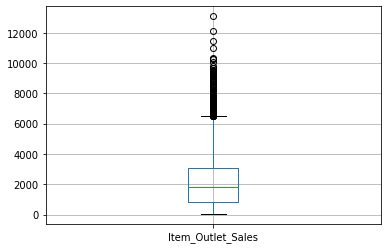

In [229]:
df.boxplot(column=['Item_Outlet_Sales'])
plt.show

<function matplotlib.pyplot.show>

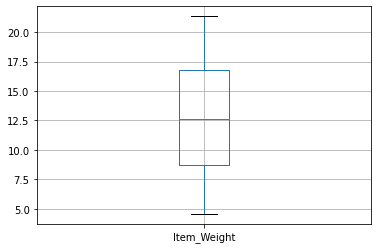

In [230]:
df.boxplot(column=['Item_Weight'])
plt.show

<function matplotlib.pyplot.show>

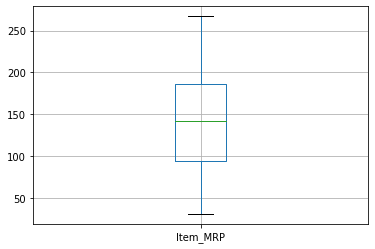

In [231]:
df.boxplot(column=['Item_MRP'])
plt.show

##Handling Outlier

<function matplotlib.pyplot.show>

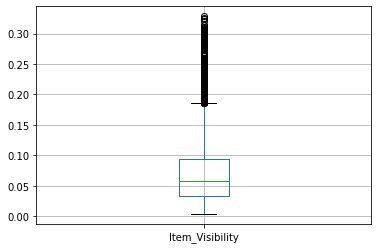

In [233]:
df.boxplot(column=['Item_Visibility'])
plt.show

<function matplotlib.pyplot.show>

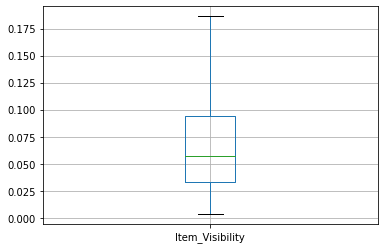

In [234]:
def replace_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_ranger=Q1-(1.5*IQR)
  upper_ranger=Q3+(1.5*IQR)
  return lower_ranger, upper_ranger
lowVisibility, uppVisibility = replace_outlier(df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']>uppVisibility,uppVisibility,df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']<lowVisibility,lowVisibility,df['Item_Visibility'])
df.boxplot(column=['Item_Visibility'])
plt.show

##Univariate Analysis

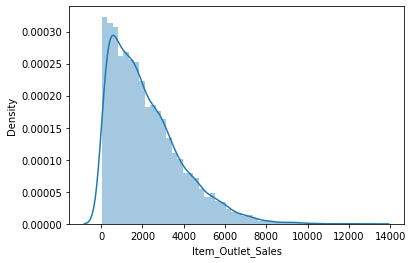

In [235]:
sns.distplot(df.Item_Outlet_Sales)

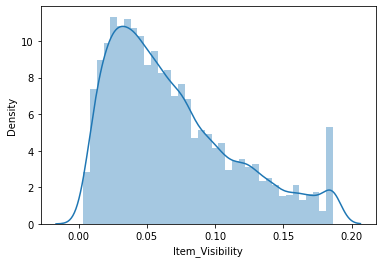

In [236]:
sns.distplot(df.Item_Visibility)

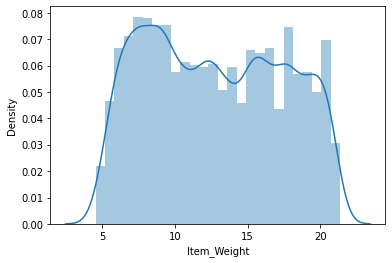

In [237]:
sns.distplot(df.Item_Weight)

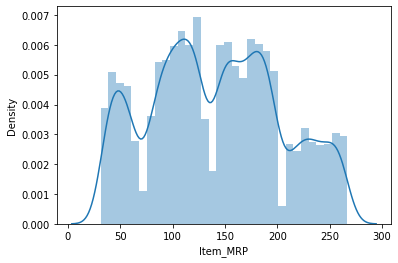

In [238]:
sns.distplot(df.Item_MRP)

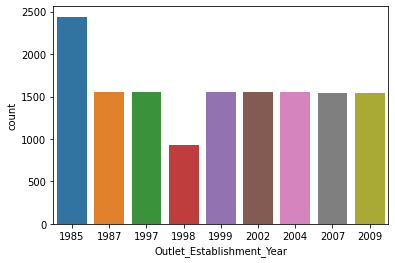

In [239]:
sns.countplot(df.Outlet_Establishment_Year)

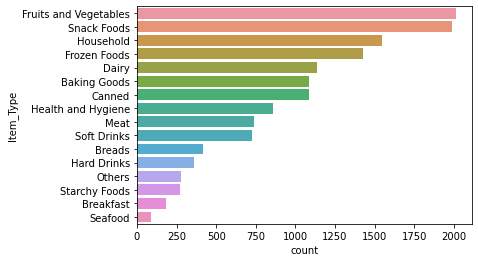

In [240]:
sns.countplot(y=df.Item_Type, order = df['Item_Type'].value_counts().index)

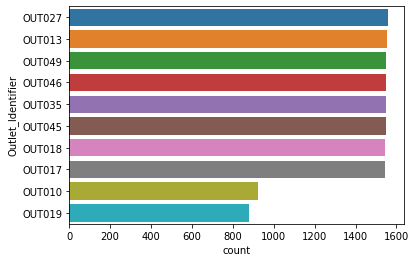

In [241]:
sns.countplot(y=df.Outlet_Identifier, order = df['Outlet_Identifier'].value_counts().index)

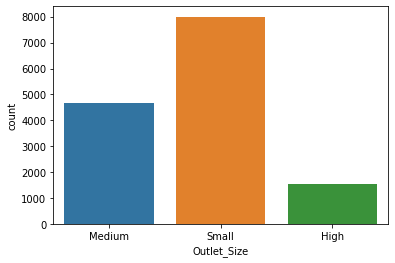

In [242]:
sns.countplot(df.Outlet_Size)

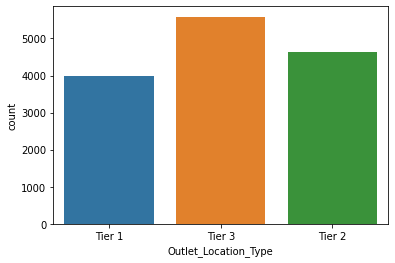

In [243]:
sns.countplot(df.Outlet_Location_Type)

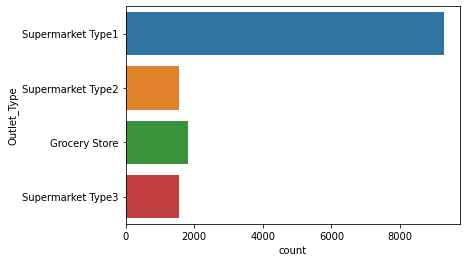

In [244]:
sns.countplot(y=df.Outlet_Type)

##Bivariate Analysis

In [245]:
# Correlation between all the variables
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,0.004100,-0.010694,0.006739,-0.006578
Item_Visibility,0.004100,1.000000,-0.007291,-0.076121,-0.119681
Item_MRP,-0.010694,-0.007291,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.006739,-0.076121,0.000141,1.000000,-0.049135
Item_Outlet_Sales,-0.006578,-0.119681,0.567574,-0.049135,1.000000


In [246]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                 -0.006578
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.119681
Name: Item_Outlet_Sales, dtype: float64

From the above result, we can see that Item_MRP has the most positive correlation and the Item_Visibility have the lowest correlation with our target variable. It is totally different from our initial hypotheses, this variable was expected to have a high impact on the sales increase. Nevertheless, since this is not expected behavior and we should investigate.

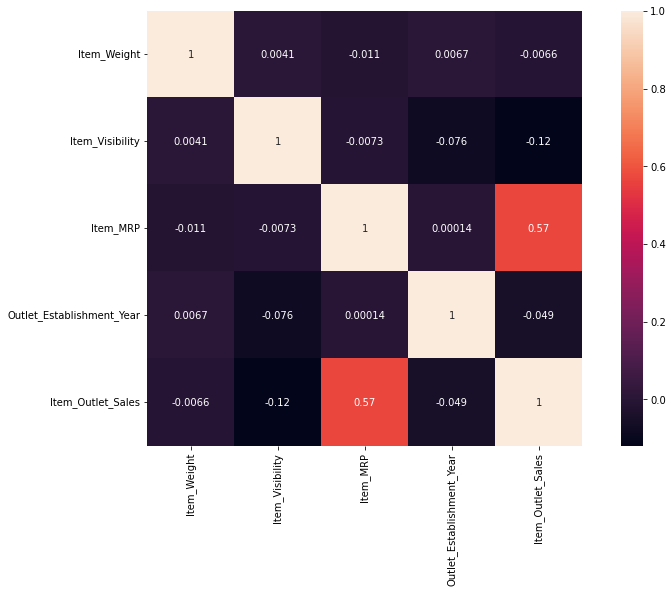

In [247]:
plt.figure(figsize = (14, 8))
sns.heatmap(corr, annot = True, square = True)

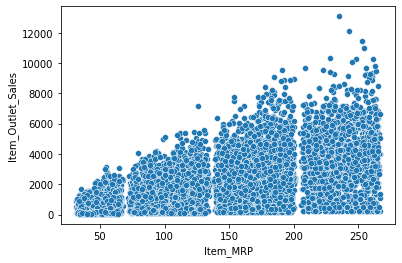

In [248]:
sns.scatterplot(x=df['Item_MRP'],y=df['Item_Outlet_Sales'])

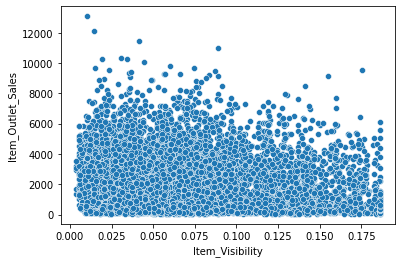

In [249]:
sns.scatterplot(x=df['Item_Visibility'],y=df['Item_Outlet_Sales'])

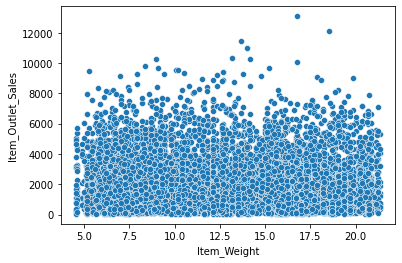

In [250]:
sns.scatterplot(x=df['Item_Weight'], y=df['Item_Outlet_Sales'])

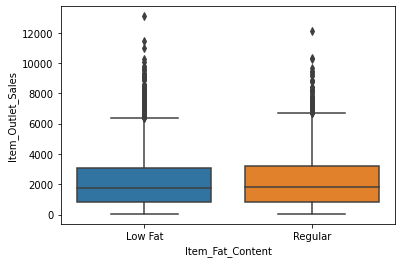

In [251]:
sns.boxplot(df.Item_Fat_Content, df.Item_Outlet_Sales)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

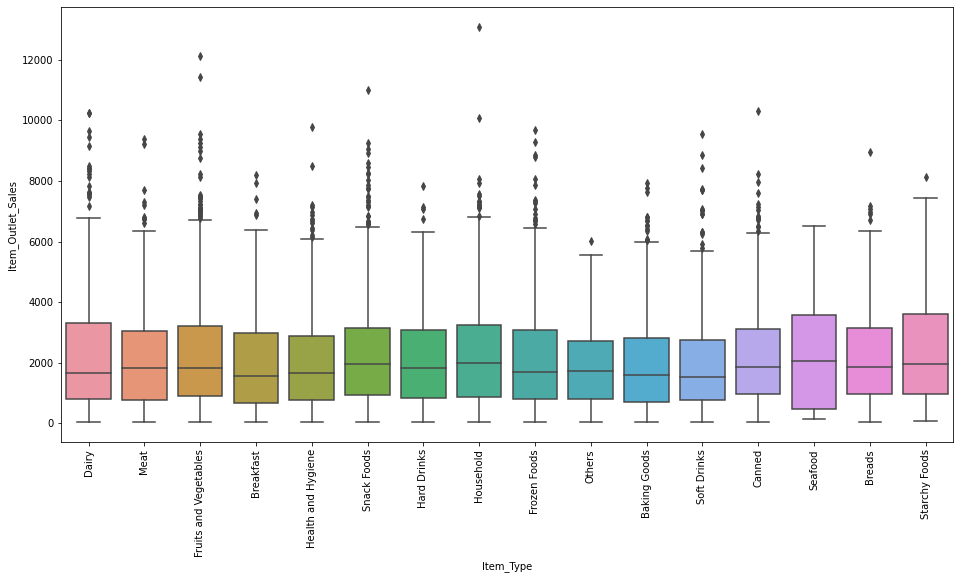

In [252]:
plt.figure(figsize = [16,8])
sns.boxplot(df.Item_Type, df.Item_Outlet_Sales)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

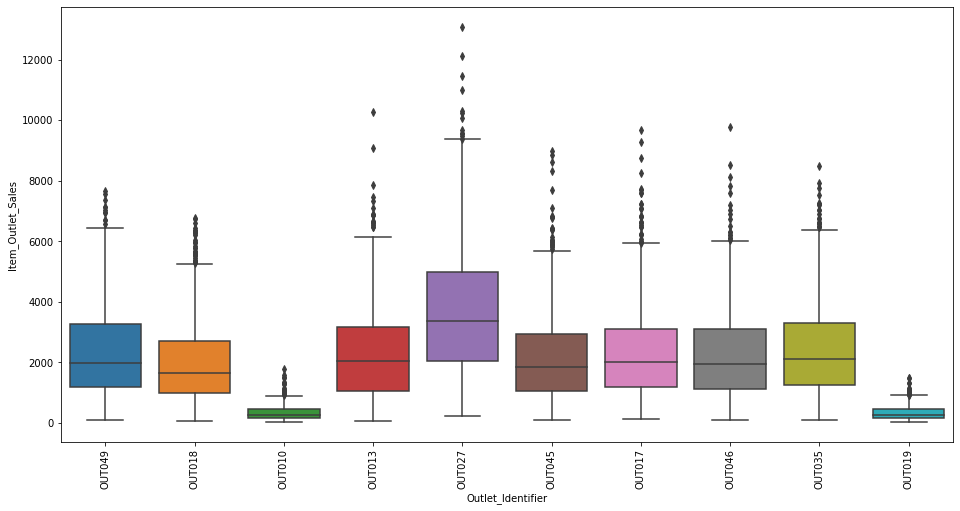

In [253]:
plt.figure(figsize = [16,8])
sns.boxplot(df.Outlet_Identifier, df.Item_Outlet_Sales)
plt.xticks(rotation=90)

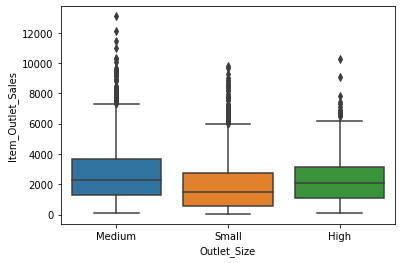

In [254]:
sns.boxplot(df.Outlet_Size, df.Item_Outlet_Sales)

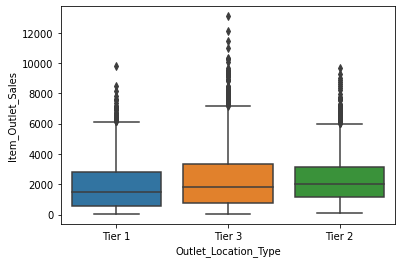

In [255]:
sns.boxplot(df.Outlet_Location_Type, df.Item_Outlet_Sales)

#**Categorical Variables**

In [280]:
# Return unique values of columns that have an object data type.
for col in df.columns:
  if df[col].dtype == object :
    print(col+ ' : ',df[col].unique())

Item_Identifier :  ['DRA12' 'DRA24' 'DRB01' ... 'FDN52' 'FDS20' 'NCN18']
Item_Fat_Content :  ['Low Fat' 'Regular']
Item_Type :  ['Dairy' 'Meat' 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene'
 'Snack Foods' 'Hard Drinks' 'Household' 'Frozen Foods' 'Others'
 'Baking Goods' 'Soft Drinks' 'Canned' 'Seafood' 'Breads' 'Starchy Foods']
Outlet_Identifier :  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
type :  ['train' 'test']
Outlet_Size :  ['Medium' 'Small' 'High']
Outlet_Location_Type :  ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type :  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [281]:
df=pd.get_dummies(df, columns=['Item_Type'])

In [282]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,DRA12,11.600,Low Fat,0.016047,249.8092,OUT049,train,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,0
1,DRA12,11.600,Low Fat,0.016760,141.6180,OUT049,train,1999,Medium,Tier 1,...,0,0,0,0,1,0,0,0,0,0
2,DRA24,19.350,Low Fat,0.053633,45.5402,OUT049,train,1999,Medium,Tier 1,...,1,0,0,0,0,0,0,0,0,0
3,DRA24,19.350,Regular,0.100014,145.4786,OUT049,train,1999,Medium,Tier 1,...,1,0,0,0,0,0,0,0,0,0
4,DRA24,19.350,Regular,0.069196,54.3614,OUT049,train,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,NCY30,20.250,Low Fat,0.065987,126.6704,OUT019,test,1985,Small,Tier 1,...,0,0,0,0,0,0,0,1,0,0
14200,NCY54,8.430,Low Fat,0.040231,101.2332,OUT019,test,1985,Small,Tier 1,...,0,0,0,1,0,0,0,0,0,0
14201,NCZ05,8.485,Regular,0.040835,185.0608,OUT019,test,1985,Small,Tier 1,...,0,0,0,0,0,0,0,0,0,0
14202,NCZ06,19.600,Regular,0.054180,123.5072,OUT019,test,1985,Small,Tier 1,...,1,0,0,0,0,0,0,0,0,0


In [283]:
def change_year(df,col):
  df['Outlet_Years'] = 2013 - df[col]
  df=df.drop(columns=[col])
  return df
def labelEncoding(df):
  df['Outlet_Type_Encoded']  = df['Outlet_Type'].replace({'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3})
  df['Outlet_Location_Type_Encoded']  = df['Outlet_Location_Type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})
  df['Item_Fat_Content_Encoded']  = df['Item_Fat_Content'].replace({'Low Fat': 1, 'Regular': 0})
  df['Outlet_Size_Encoded']  = df['Outlet_Size'].replace({'Small': 0, 'Medium': 1, 'High': 2})
  return df
from sklearn.preprocessing import OrdinalEncoder
def Ordinal_Encoder(df, cols):
  ordinal_encoder = OrdinalEncoder()
  df[cols] = ordinal_encoder.fit_transform(df[cols])
  return df
object_cols= ['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
df = labelEncoding(df)
df = Ordinal_Encoder(df, ['Outlet_Identifier'])
df = change_year(df,'Outlet_Establishment_Year')
df=df.drop(columns=['Outlet_Type', 'Outlet_Location_Type','Item_Fat_Content','Outlet_Size'])#

In [284]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Encoded,Outlet_Location_Type_Encoded,Item_Fat_Content_Encoded,Outlet_Size_Encoded,Outlet_Years
0,DRA12,11.600,0.016047,249.8092,9.0,train,3735.1380,0,0,0,...,0,0,0,0,0,1,1,1,1,14
1,DRA12,11.600,0.016760,141.6180,9.0,train,2097.2700,0,0,0,...,0,0,0,0,0,1,1,1,1,14
2,DRA24,19.350,0.053633,45.5402,9.0,train,1516.0266,0,0,0,...,0,0,0,0,0,1,1,1,1,14
3,DRA24,19.350,0.100014,145.4786,9.0,train,1589.2646,0,0,0,...,0,0,0,0,0,1,1,0,1,14
4,DRA24,19.350,0.069196,54.3614,9.0,train,718.3982,0,0,1,...,0,0,0,0,0,1,1,0,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,NCY30,20.250,0.065987,126.6704,4.0,test,NaN,0,0,0,...,0,0,1,0,0,0,1,1,0,28
14200,NCY54,8.430,0.040231,101.2332,4.0,test,NaN,0,0,0,...,0,0,0,0,0,0,1,1,0,28
14201,NCZ05,8.485,0.040835,185.0608,4.0,test,NaN,0,0,0,...,0,0,0,0,0,0,1,0,0,28
14202,NCZ06,19.600,0.054180,123.5072,4.0,test,NaN,0,0,0,...,0,0,0,0,0,0,1,0,0,28


#**Feature engineering**

      Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0               DRA12       11.600         0.016047  249.8092   
1               DRA12       11.600         0.016760  141.6180   
2               DRA24       19.350         0.053633   45.5402   
3               DRA24       19.350         0.100014  145.4786   
4               DRA24       19.350         0.069196   54.3614   
...               ...          ...              ...       ...   
13847           FDT15       12.150         0.127234  158.3920   
13848           FDT16        9.895         0.074518  227.3720   
13849           FDT19        7.590         0.019114  182.1608   
13850           FDT20       10.500         0.050740  154.5340   
13851           FDT21        7.420         0.102296  162.3552   

       Outlet_Identifier   type  Item_Outlet_Sales  Item_Type_Baking Goods  \
0                    9.0  train          3735.1380                       0   
1                    9.0  train          2097.2700             

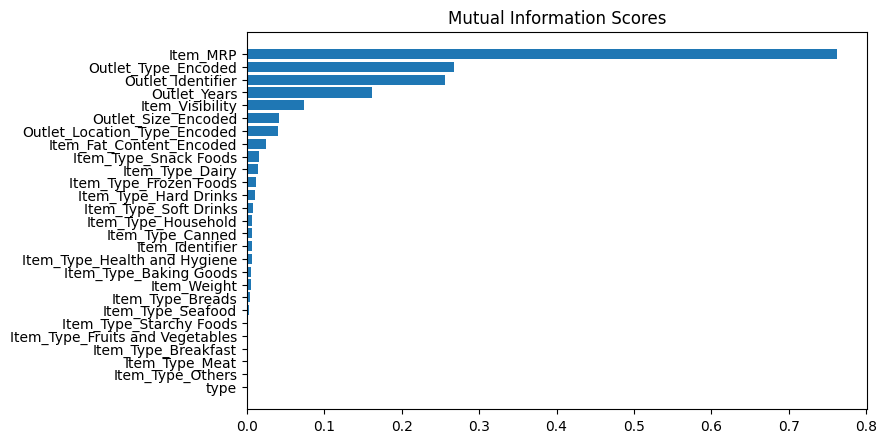

In [285]:
from sklearn.feature_selection import mutual_info_regression
X = df.loc[df['type'] == 'train']
print(X)
y = X.pop("Item_Outlet_Sales")
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores)
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [289]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Encoded,Outlet_Location_Type_Encoded,Item_Fat_Content_Encoded,Outlet_Size_Encoded,Outlet_Years
0,DRA12,11.600,0.016047,249.8092,9.0,train,3735.1380,0,0,0,...,0,0,0,0,0,1,1,1,1,14
1,DRA12,11.600,0.016760,141.6180,9.0,train,2097.2700,0,0,0,...,0,0,0,0,0,1,1,1,1,14
2,DRA24,19.350,0.053633,45.5402,9.0,train,1516.0266,0,0,0,...,0,0,0,0,0,1,1,1,1,14
3,DRA24,19.350,0.100014,145.4786,9.0,train,1589.2646,0,0,0,...,0,0,0,0,0,1,1,0,1,14
4,DRA24,19.350,0.069196,54.3614,9.0,train,718.3982,0,0,1,...,0,0,0,0,0,1,1,0,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,NCY30,20.250,0.065987,126.6704,4.0,test,NaN,0,0,0,...,0,0,1,0,0,0,1,1,0,28
14200,NCY54,8.430,0.040231,101.2332,4.0,test,NaN,0,0,0,...,0,0,0,0,0,0,1,1,0,28
14201,NCZ05,8.485,0.040835,185.0608,4.0,test,NaN,0,0,0,...,0,0,0,0,0,0,1,0,0,28
14202,NCZ06,19.600,0.054180,123.5072,4.0,test,NaN,0,0,0,...,0,0,0,0,0,0,1,0,0,28


In [294]:
features = ['Item_MRP','Outlet_Type_Encoded','Outlet_Identifier','Outlet_Years','Item_Visibility','Outlet_Size_Encoded',
            'Outlet_Location_Type_Encoded','Item_Fat_Content_Encoded']
# features = ['Item_MRP','Outlet_Type','Outlet_Identifier','Outlet_Establishment_Year','Item_Visibility',
#             'Item_Type','Outlet_Location_Type','Outlet_Size','Item_Fat_Content','Item_Weight']
train = df.loc[df['type'] == 'train']
train.reset_index(drop=True, inplace=True)
inputs = train[features]
output = train.Item_Outlet_Sales

In [295]:
inputs

,Item_MRP,Outlet_Type_Encoded,Outlet_Identifier,Outlet_Years,Item_Visibility,Outlet_Size_Encoded,Outlet_Location_Type_Encoded,Item_Fat_Content_Encoded
0,249.8092,1,9.0,14,0.016047,1,1,1
1,141.6180,1,9.0,14,0.016760,1,1,1
2,45.5402,1,9.0,14,0.053633,1,1,1
3,145.4786,1,9.0,14,0.100014,1,1,0
4,54.3614,1,9.0,14,0.069196,1,1,0
...,...,...,...,...,...,...,...,...
8518,158.3920,0,4.0,28,0.127234,0,1,1
8519,227.3720,0,4.0,28,0.074518,0,1,1
8520,182.1608,0,4.0,28,0.019114,0,1,0
8521,154.5340,0,4.0,28,0.050740,0,1,1


In [296]:
output

0       3735.1380
1       2097.2700
2       1516.0266
3       1589.2646
4        718.3982
          ...    
8518     159.7920
8519     452.7440
8520     367.5216
8521     459.4020
8522     487.3656
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

#**Model**

In [323]:
test = df.loc[df['type'] == 'test']
test.reset_index(drop=True, inplace=True)
test=test.drop(columns=['Item_Outlet_Sales'])
test = test[features]
test

,Item_MRP,Outlet_Type_Encoded,Outlet_Identifier,Outlet_Years,Item_Visibility,Outlet_Size_Encoded,Outlet_Location_Type_Encoded,Item_Fat_Content_Encoded
0,107.8622,1,9.0,14,0.007565,1,1,1
1,122.3098,1,9.0,14,0.092738,1,1,1
2,151.6366,1,9.0,14,0.079451,1,1,0
3,188.8188,1,9.0,14,0.011279,1,1,1
4,180.0976,1,9.0,14,0.015711,1,1,1
...,...,...,...,...,...,...,...,...
5676,126.6704,0,4.0,28,0.065987,0,1,1
5677,101.2332,0,4.0,28,0.040231,0,1,1
5678,185.0608,0,4.0,28,0.040835,0,1,0
5679,123.5072,0,4.0,28,0.054180,0,1,0


In [324]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def modelfit(model, dtrain, dtest, df, target, filename):
  model.fit(dtrain, target)
        
  #Predict training set:
  dtrain_predictions = model.predict(dtrain)

  #Perform cross-validation:
  cv_score = cross_val_score(model, dtrain, target, cv=20, scoring='neg_mean_squared_error')
  cv_score = np.sqrt(np.abs(cv_score))

  #Print model report:
  print("\nModel Report")
  print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(target.values, dtrain_predictions)))
  print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

  #Export submission file:
  submission = df[['Item_Identifier','Outlet_Identifier']]
  #Predict on testing data:
  submission[target]=model.predict(dtest)
  submission.to_csv(filename, index=False)

In [325]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
baseline = testDf[['Item_Identifier','Outlet_Identifier']]
baseline['Item_Outlet_Sales'] = mean_sales

#Export submission file
baseline.to_csv("/content/drive/MyDrive/Bigmart/alg0.csv",index=False)

In [326]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
path ='/content/drive/MyDrive/Bigmart/'
predictors = [x for x in inputs.columns if x not in [target]+IDcol]
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=10, random_state=1)
modelfit(model1, inputs, test, testDf, output, path+'RandomForest.csv')


Model Report
RMSE : 504.2
CV Score : Mean - 1149 | Std - 296 | Min - 233.7 | Max - 1661


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# X_train, X_test, y_train, y_test = train_test_split(inputs,output, test_size = 0.20, random_state=44)
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=10, random_state=1)
    model.fit(train_X, train_y)
    out = model.predict(val_X)
    MAE = mean_absolute_error(val_y, out)
    MSE = mean_squared_error(val_y, out)
    print(model.score(val_X, val_y)) 
    return MAE,MSE
# score_dataset(X_train, X_test, y_train, y_test)

0.5364746635278449


(836.7078141114368, 1403314.9464505585)